<a href="https://colab.research.google.com/github/Shreyas30/Image_Captioning/blob/main/Image_Captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Loading Dataset From Kaggle**

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jainamshah17/flicker8k-image-captioning

 99% 1.15G/1.16G [00:10<00:00, 122MB/s]
100% 1.16G/1.16G [00:10<00:00, 119MB/s]


In [ ]:
!unzip "/content/flicker8k-image-captioning.zip" -d "/content/dataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Flickr8k_Dataset/Flicker8k_Dataset/2848571082_26454cb981.jpg  
  inflating: /content/dataset/Flickr8k_Dataset/Flicker8k_Dataset/2848895544_6d06210e9d.jpg  
  inflating: /content/dataset/Flickr8k_Dataset/Flicker8k_Dataset/2848977044_446a31d86e.jpg  
  inflating: /content/dataset/Flickr8k_Dataset/Flicker8k_Dataset/2849194983_2968c72832.jpg  
  inflating: /content/dataset/Flickr8k_Dataset/Flicker8k_Dataset/2850719435_221f15e951.jpg  
  inflating: /content/dataset/Flickr8k_Dataset/Flicker8k_Dataset/2851198725_37b6027625.jpg  
  inflating: /content/dataset/Flickr8k_Dataset/Flicker8k_Dataset/2851304910_b5721199bc.jpg  
  inflating: /content/dataset/Flickr8k_Dataset/Flicker8k_Dataset/2851931813_eaf8ed7be3.jpg  
  inflating: /content/dataset/Flickr8k_Dataset/Flicker8k_Dataset/2852982055_8112d0964f.jpg  
  inflating: /content/dataset/Flickr8k_Dataset/Flicker8k_Dataset/285306009_f6ddabe687.jpg  
  inflating: /conten


#**Data Preprocessing**

##1. Image Preprocessing

In [ ]:
import cv2
import os
from glob import glob

In [ ]:
images_path = '/content/dataset/Flickr8k_Dataset/Flicker8k_Dataset/'
images_path_list = glob(images_path+'*.jpg')         # List of Paths of all Images
TOTAL_DATA = len(images_path_list)
print(TOTAL_DATA)

8091


In [ ]:
images_path_list[:3]

['/content/dataset/Flickr8k_Dataset/Flicker8k_Dataset/3288174272_2daa06d360.jpg',
 '/content/dataset/Flickr8k_Dataset/Flicker8k_Dataset/3357416302_fcfcdd7b86.jpg',
 '/content/dataset/Flickr8k_Dataset/Flicker8k_Dataset/3691592651_6e4e7f1da9.jpg']

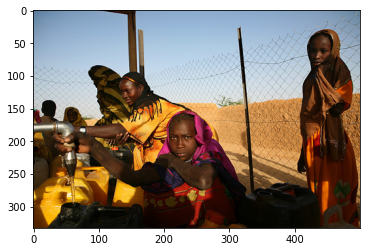

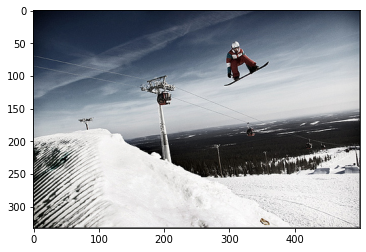

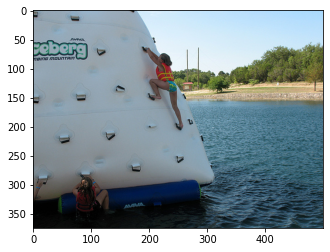

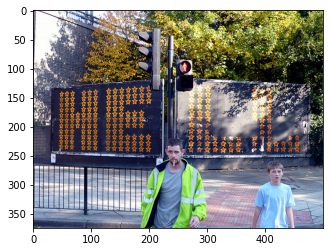

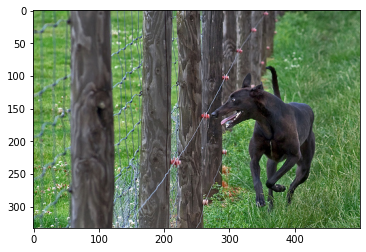

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images_path_list[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

###Loading Pre-trained Resnet50 Model from Keras

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
resnet50_model = ResNet50(include_top=True)

In [ ]:
resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
from tensorflow.keras.models import Model
resnet_output = resnet50_model.layers[-2].output # Output of 2nd Last Layer
model = Model(inputs = resnet50_model.input,outputs = resnet_output)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

####Preparing a Dictionary with Key as Image_name and Value as its features after feeding it to Resnet50 Model

In [ ]:
image_encodings = {} # Dictionary 

for image_path in images_path_list:
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224)) 
    img = img.reshape(1,224,224,3)

    encoding = model.predict(img).reshape(2048,) # Feeding image to Resnet50 Model 
    img_name = image_path.split('/')[-1] #Getting Image name from Path
    img_name = img_name.split(".")[0] # Removing .jpg from name
    image_encodings[img_name] = encoding

####Saving Image Encodings into Pickle File



In [ ]:
import pickle

In [ ]:
with open('image_encodings.pkl', 'wb') as f:
    pickle.dump(image_encodings, f, protocol=pickle.HIGHEST_PROTOCOL)

####Loading Image Encodings from Pickle File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/Image Captioning Project/image_encodings.pkl', 'rb') as f:
    image_encodings = pickle.load(f)

In [ ]:
image_encodings

{'3534183988_3763593dfb': array([0.8497874 , 4.934304  , 0.03376511, ..., 1.174157  , 0.03526262,
        0.03252457], dtype=float32),
 '3202255152_08973fa3d7': array([0.48727515, 0.6811386 , 2.1693745 , ..., 1.0317662 , 0.55150664,
        0.1430389 ], dtype=float32),
 '3300679815_2c6c2301cb': array([0.7657554 , 4.8051543 , 0.        , ..., 0.16832697, 1.5668972 ,
        0.23465581], dtype=float32),
 '3081182021_22cfa18dd4': array([0.18738835, 1.4415383 , 0.6120881 , ..., 1.3697633 , 0.04535241,
        0.80340147], dtype=float32),
 '3586239953_da4fb3f775': array([1.7945094 , 0.255786  , 0.09628125, ..., 1.8068283 , 1.4749551 ,
        0.5984002 ], dtype=float32),
 '3493255026_5fdaa52cbe': array([1.4768599 , 0.14808904, 0.04902666, ..., 0.01651137, 0.        ,
        0.01831462], dtype=float32),
 '2728486640_cc2a31d2b0': array([0.53437185, 0.6973173 , 0.3456238 , ..., 3.0337415 , 1.2092483 ,
        0.5654582 ], dtype=float32),
 '522063319_33827f1627': array([0.5665491 , 2.7380521 ,

##2. Text Preprocessing

In [ ]:
caption_path = '/content/dataset/Flickr8k_text/Flickr8k.token.txt'

In [ ]:
caption_list = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [ ]:
len(caption_list)

40461

In [ ]:
caption_list.pop() # REmoving Blank Item

''

In [ ]:
caption_list[:10]

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .']

####Creating Dictionary with key as image name and value as list of 5 captions

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
MAX_WORDS_LEN = 0
caption_dict = {} #Dictionary of Captions
for caption in caption_list:
    img_name = caption.split("\t")[0][:-6] # Name of Image
    capt = caption.split('\t')[1] # Actual Caption
    list_words = tokenizer.tokenize(capt)
    MAX_WORDS_LEN = max(MAX_WORDS_LEN,len(list_words))
    capt = "startseq " + " ".join(list_words) + " endseq"
    if img_name not in caption_dict:
        caption_dict[img_name] = [capt]              
    else:
        caption_dict[img_name].append(capt)
            

In [ ]:
# MAX no of Words in a Caption
print(MAX_WORDS_LEN) 

37


In [ ]:
caption_dict

{'1000268201_693b08cb0e': ['startseq A child in a pink dress is climbing up a set of stairs in an entry way endseq',
  'startseq A girl going into a wooden building endseq',
  'startseq A little girl climbing into a wooden playhouse endseq',
  'startseq A little girl climbing the stairs to her playhouse endseq',
  'startseq A little girl in a pink dress going into a wooden cabin endseq'],
 '1001773457_577c3a7d70': ['startseq A black dog and a spotted dog are fighting endseq',
  'startseq A black dog and a tri colored dog playing with each other on the road endseq',
  'startseq A black dog and a white dog with brown spots are staring at each other in the street endseq',
  'startseq Two dogs of different breeds looking at each other on the road endseq',
  'startseq Two dogs on pavement moving toward each other endseq'],
 '1002674143_1b742ab4b8': ['startseq A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl endseq',
  'startseq A little girl is sitt

In [ ]:
list_captions = [] #List of All Captions
for sublist in caption_dict.values():
    for caption in sublist:
      list_captions.append(caption)

In [ ]:
list_captions[:10]

['startseq A child in a pink dress is climbing up a set of stairs in an entry way endseq',
 'startseq A girl going into a wooden building endseq',
 'startseq A little girl climbing into a wooden playhouse endseq',
 'startseq A little girl climbing the stairs to her playhouse endseq',
 'startseq A little girl in a pink dress going into a wooden cabin endseq',
 'startseq A black dog and a spotted dog are fighting endseq',
 'startseq A black dog and a tri colored dog playing with each other on the road endseq',
 'startseq A black dog and a white dog with brown spots are staring at each other in the street endseq',
 'startseq Two dogs of different breeds looking at each other on the road endseq',
 'startseq Two dogs on pavement moving toward each other endseq']

###Creating Vocabulory


In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list_captions)

In [ ]:
tokenizer.word_counts

OrderedDict([('startseq', 40460),
             ('a', 62995),
             ('child', 1545),
             ('in', 18987),
             ('pink', 739),
             ('dress', 348),
             ('is', 9345),
             ('climbing', 507),
             ('up', 1302),
             ('set', 109),
             ('of', 6723),
             ('stairs', 109),
             ('an', 2432),
             ('entry', 1),
             ('way', 53),
             ('endseq', 40460),
             ('girl', 3328),
             ('going', 149),
             ('into', 1074),
             ('wooden', 284),
             ('building', 511),
             ('little', 1768),
             ('playhouse', 6),
             ('the', 18420),
             ('to', 3176),
             ('her', 1178),
             ('cabin', 4),
             ('black', 3848),
             ('dog', 8138),
             ('and', 8863),
             ('spotted', 38),
             ('are', 3505),
             ('fighting', 133),
             ('tri', 14),
             ('col

In [ ]:
tokenizer.word_index

{'a': 1,
 'startseq': 2,
 'endseq': 3,
 'in': 4,
 'the': 5,
 'on': 6,
 'is': 7,
 'and': 8,
 'dog': 9,
 'with': 10,
 'man': 11,
 'of': 12,
 'two': 13,
 'white': 14,
 'black': 15,
 'boy': 16,
 'are': 17,
 'woman': 18,
 'girl': 19,
 'to': 20,
 'wearing': 21,
 'at': 22,
 'people': 23,
 'water': 24,
 'red': 25,
 'young': 26,
 'brown': 27,
 'an': 28,
 'his': 29,
 'blue': 30,
 'dogs': 31,
 'running': 32,
 'through': 33,
 'playing': 34,
 'while': 35,
 'shirt': 36,
 'down': 37,
 'standing': 38,
 'ball': 39,
 'little': 40,
 'grass': 41,
 'snow': 42,
 'child': 43,
 'person': 44,
 'jumping': 45,
 'over': 46,
 'three': 47,
 'front': 48,
 'sitting': 49,
 'holding': 50,
 'up': 51,
 'field': 52,
 'small': 53,
 'by': 54,
 'large': 55,
 'green': 56,
 'one': 57,
 'group': 58,
 'yellow': 59,
 'her': 60,
 'walking': 61,
 'children': 62,
 'men': 63,
 'into': 64,
 'air': 65,
 'beach': 66,
 'near': 67,
 'mouth': 68,
 'jumps': 69,
 'another': 70,
 'for': 71,
 'street': 72,
 'runs': 73,
 'its': 74,
 'from': 75,

In [ ]:
VOCAB_SIZE = len(tokenizer.word_counts) #No of Unique Words

In [ ]:
VOCAB_SIZE

8490

#Visualizations

###**Visualization of Images with Captions**

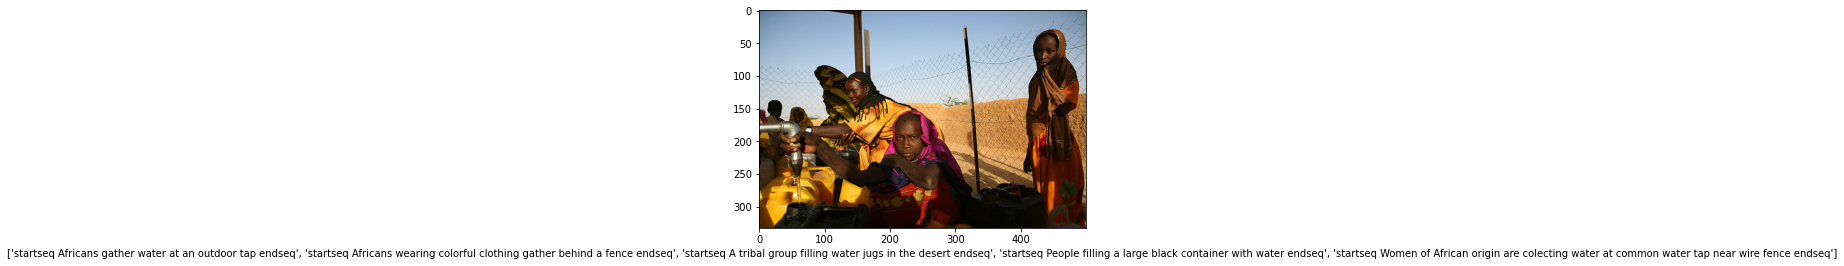

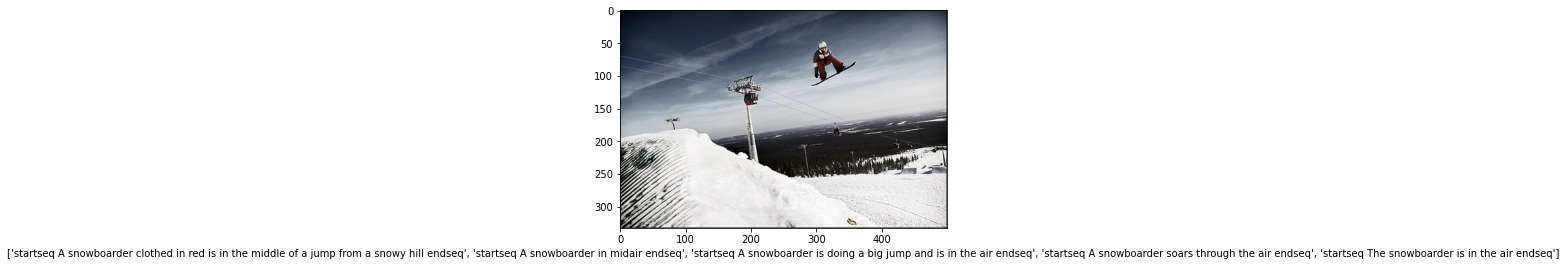

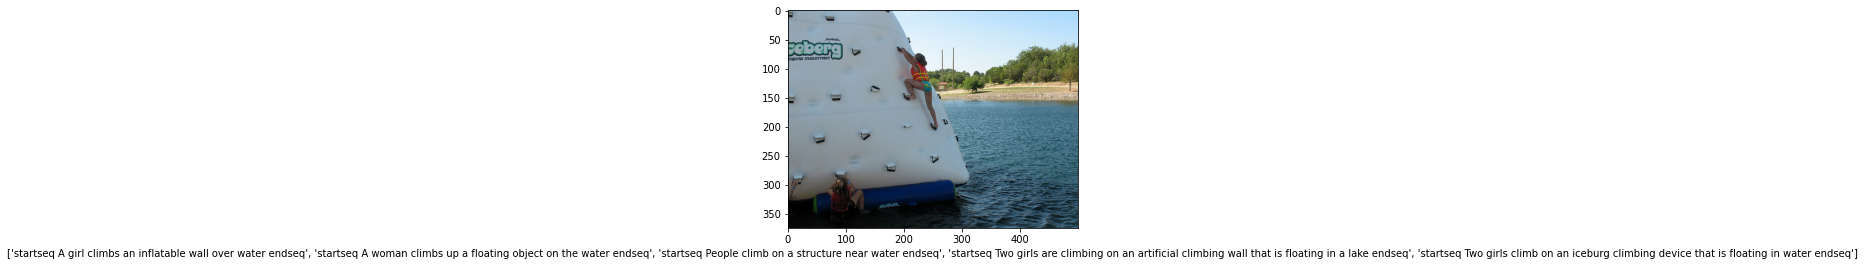

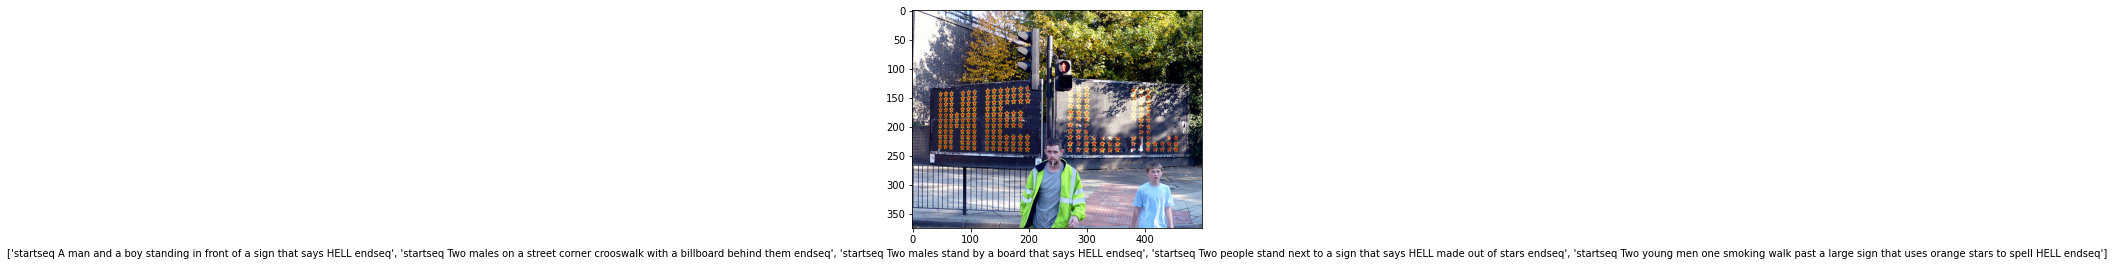

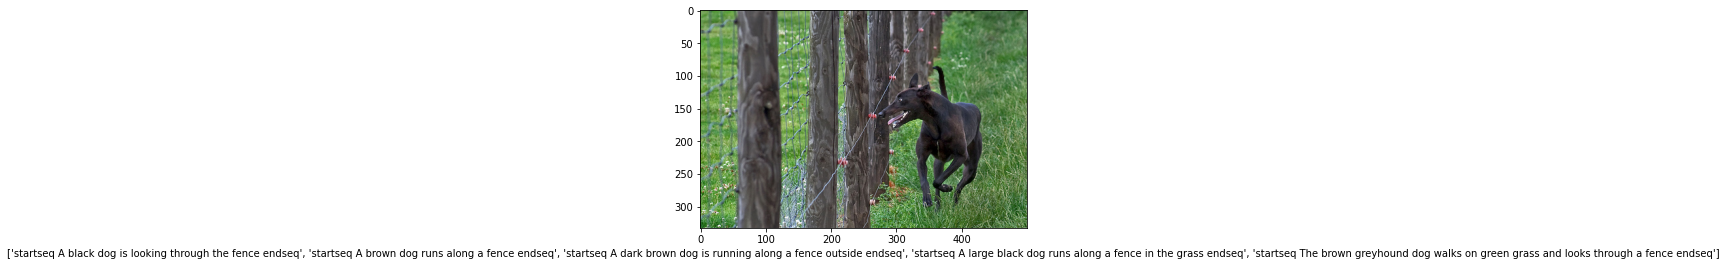

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images_path_list[i]
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(caption_dict[img_name.split('/')[-1][:-4]])
    plt.imshow(img)

####Creating DataFrame showing Word and its Count

In [ ]:
import pandas as pd
df = pd.DataFrame({"word": tokenizer.word_counts.keys(),"word_count":tokenizer.word_counts.values()})
df.sort_values(by="word_count",inplace=True,ignore_index=True,ascending=False)
df.head(10)

,word,word_count
0,a,62995
1,startseq,40460
2,endseq,40460
3,in,18987
4,the,18420
5,on,10746
6,is,9345
7,and,8863
8,dog,8138
9,with,7765


### Frequency of Counts 

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

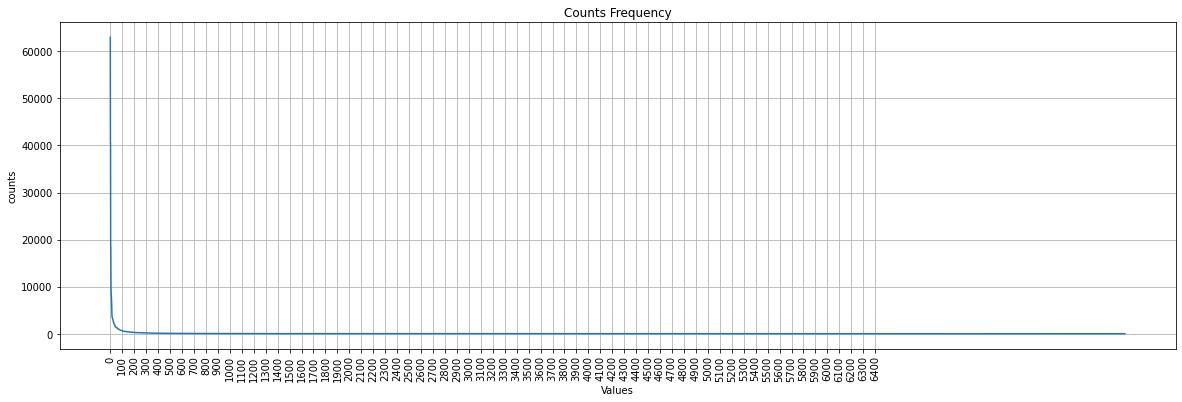

In [ ]:
df['word_count'].plot(grid = True, figsize = (20,6))
plt.title("Counts Frequency")
plt.xlabel("Values")
plt.xticks(np.arange(0, 6500, 100), rotation = 90)
plt.ylabel('counts')
plt.show()

### Distribution of top 50 words

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Plot of count vs words')

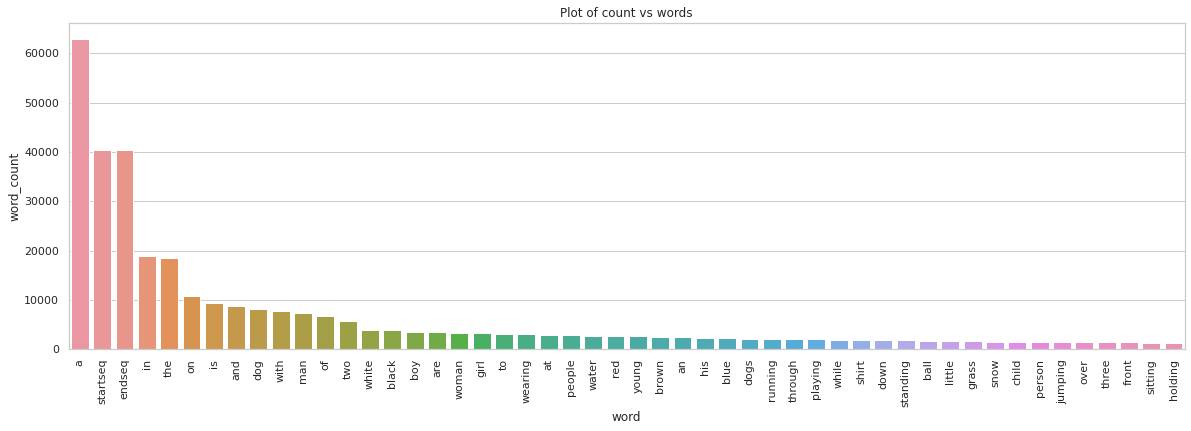

In [ ]:
sns.set(style = "whitegrid")
plt.figure(figsize = (20,6))
sns.barplot(x = "word", y = "word_count", data = df[:50])
plt.xticks(rotation = 'vertical')
plt.title("Plot of count vs words")

### Distribution of last 100 words

Text(0.5, 1.0, 'Plot of count vs words')

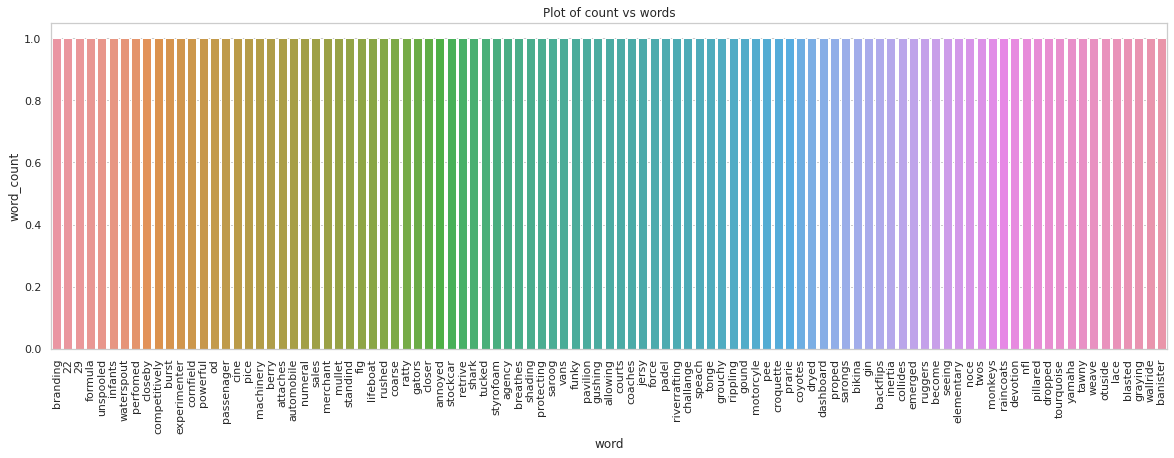

In [ ]:
sns.set(style = "whitegrid")
plt.figure(figsize = (20,6))
sns.barplot(x = "word", y = "word_count", data = df[-100:-1])
plt.xticks(rotation = 'vertical')
plt.title("Plot of count vs words")

#Model Training 

##Word Embeddings

###Loading Pretrained Word Embeddings

In [ ]:
!kaggle datasets download -d adityajn105/glove6b50d

 84% 57.0M/67.7M [00:01<00:00, 44.7MB/s]
100% 67.7M/67.7M [00:01<00:00, 53.8MB/s]


In [ ]:
!unzip "/content/glove6b50d.zip" -d "/content/embbedings"

Archive:  /content/glove6b50d.zip
  inflating: /content/embbedings/glove.6B.50d.txt  


In [ ]:
# the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062

In [ ]:
import numpy as np
path_to_glove_file = "/content/embbedings/glove.6B.50d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embeddings_index["man"]

array([-0.094386,  0.43007 , -0.17224 , -0.45529 ,  1.6447  ,  0.40335 ,
       -0.37263 ,  0.25071 , -0.10588 ,  0.10778 , -0.10848 ,  0.15181 ,
       -0.65396 ,  0.55054 ,  0.59591 , -0.46278 ,  0.11847 ,  0.64448 ,
       -0.70948 ,  0.23947 , -0.82905 ,  1.272   ,  0.033021,  0.2935  ,
        0.3911  , -2.8094  , -0.70745 ,  0.4106  ,  0.3894  , -0.2913  ,
        2.6124  , -0.34576 , -0.16832 ,  0.25154 ,  0.31216 ,  0.31639 ,
        0.12539 , -0.012646,  0.22297 , -0.56585 , -0.086264,  0.62549 ,
       -0.0576  ,  0.29375 ,  0.66005 , -0.53115 , -0.48233 , -0.97925 ,
        0.53135 , -0.11725 ], dtype=float32)

###Embedding Matrix

In [ ]:
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((VOCAB_SIZE + 1, 50))
for word, i in tokenizer.word_index.items() :
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 7828 words (662 misses)


###Embbeding Layer

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow import keras
embedding_layer = Embedding( VOCAB_SIZE + 1, 50, embeddings_initializer = keras.initializers.Constant(embedding_matrix), trainable=False)

##Creating Model

In [ ]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Dense,LSTM,Embedding,Dropout,Concatenate,RepeatVector,TimeDistributed,Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from numpy import array

In [ ]:
# Image Network
image_model = Sequential()
image_model.add(Dense(100, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(MAX_WORDS_LEN))
image_model.summary()

# Caption Network
caption_model = Sequential()
caption_model.add(Embedding(input_dim=(VOCAB_SIZE+1), output_dim=100, input_length=MAX_WORDS_LEN))
caption_model.add(LSTM(256, return_sequences=True))
caption_model.add(TimeDistributed(Dense(100)))
caption_model.summary()

# Decoder Network - Providing Output of Image and Caption Network to Decoder Network as Input
conca = Concatenate()([image_model.output, caption_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(VOCAB_SIZE + 1)(x)
out = Activation('softmax')(x)

model = Model(inputs=[image_model.input, caption_model.input], outputs = out)
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# summarize model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               204900    
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 37, 100)           0         
Total params: 204,900
Trainable params: 204,900
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 37, 100)           849100    
_________________________________________________________________
lstm_7 (LSTM)                (None, 37, 256)           365568    
_________________________________________________________________
time_distributed_3 (TimeDist (None, 37, 100)           25700     
Total params: 1,240,368
Tr

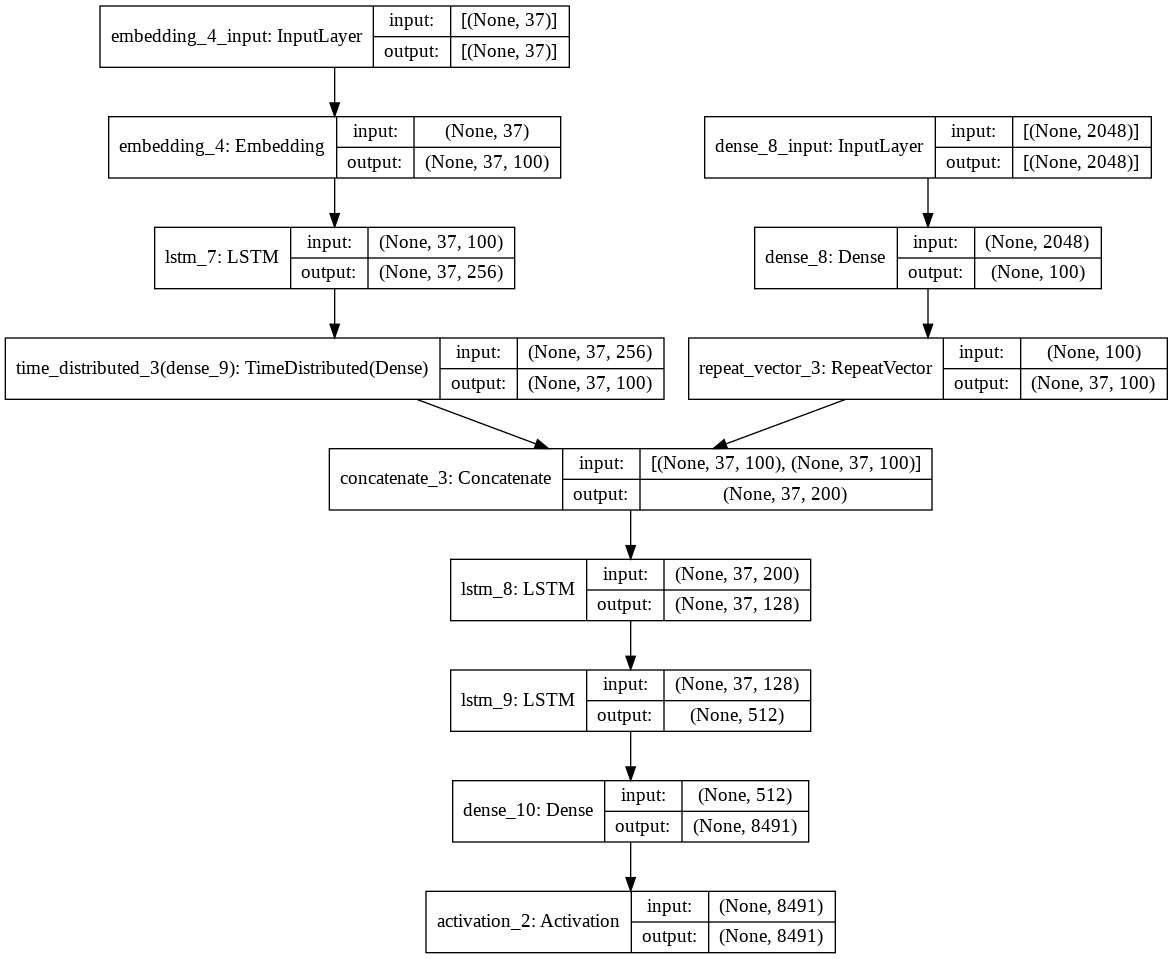

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True,show_layer_names = True)

##Preparing Train Data

In [ ]:
# List of Ids of All Images
image_ids = list(image_encodings.keys())
total_images = len(image_ids)
print(image_ids[:10])

['3534183988_3763593dfb', '3202255152_08973fa3d7', '3300679815_2c6c2301cb', '3081182021_22cfa18dd4', '3586239953_da4fb3f775', '3493255026_5fdaa52cbe', '2728486640_cc2a31d2b0', '522063319_33827f1627', '285306009_f6ddabe687', '493542985_c85ad29ebe']


In [ ]:
import random 
random.seed(0)
random.shuffle(image_ids)

#Randomly Picking 1000 Train Images
train_ids = image_ids[:1000]
print("Size of Train Data : ",len(train_ids))

Size of Train Data :  1000


In [ ]:
# Creating Dictionary for Train Image Encodings
train_image_encodings = {id:image_encodings[id] for id in train_ids}

In [ ]:
# Creating List of Input Image, Partial Caption and Next Word in the Caption
X = []
y_in = []
y_out = []

for key in list(train_image_encodings.keys()):
    for cap_list in caption_dict[key]:
        tokenized_words = tokenizer.texts_to_sequences(cap_list.split(" "))
        tokenized_words = [item[0] for item in tokenized_words]
        for i in range(1, len(tokenized_words)):
          
            X.append(train_image_encodings[key])

            in_seq= [tokenized_words[:i]]
            out_seq = tokenized_words[i]

            in_seq = pad_sequences(in_seq, maxlen=MAX_WORDS_LEN, padding='post')[0]
            out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE+1)[0]
        
            y_in.append(in_seq)
            y_out.append(out_seq)

In [ ]:
X = np.array(X, dtype='float64')

In [ ]:
y_in = np.array(y_in, dtype='float64')

In [ ]:
y_out = np.array(y_out, dtype='float64')

In [ ]:
X.shape

(59192, 2048)

In [ ]:
y_in.shape

(59192, 37)

In [ ]:
y_out.shape

(59192, 8491)

##Training Model 

In [ ]:
from keras.callbacks import ModelCheckpoint, CSVLogger

In [ ]:
filepath="checkpoint/epoch-{epoch:02d}.hdf5" #File name includes epoch 

checkpoint = ModelCheckpoint(filepath )
#CSVLogger logs epoch, acc, loss, val_acc, val_loss
log_csv = CSVLogger('my_logs.csv', separator=',', append=False)
callbacks_list = [checkpoint, log_csv]

# Fit Model
model.fit( [X, y_in], y_out, epochs=100, batch_size = 32,callbacks=callbacks_list)

##Generating Caption

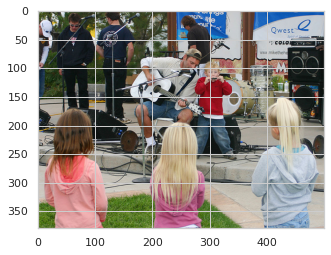

In [ ]:
plt.figure()
img = cv2.imread("/content/dataset/Flickr8k_Dataset/Flicker8k_Dataset/2095478050_736c4d2d28.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
#Loading Model
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/Image Captioning Project/Model2-K/checkpoint/Copy of epoch-100.hdf5")

In [ ]:
text_inp = ['startseq']

count = 0
caption = ''
while count < 25:
    count += 1

    encoded = []
    for i in text_inp:
        encoded.append(tokenizer.texts_to_sequences([i])[0])

    encoded = [encoded]

    encoded = pad_sequences(encoded, padding='post', maxlen=MAX_WORDS_LEN)

    prediction = np.argmax(model.predict([image_encodings["2095478050_736c4d2d28"].reshape(1,-1), encoded]))

    sampled_word = tokenizer.sequences_to_texts([[prediction]])
    caption = caption + ' ' + sampled_word[0]
        
    if sampled_word[0] == 'endseq':
        break

    text_inp.append(sampled_word[0])

In [ ]:
caption

' a girl in a crowd its red hair with up a yellow girl in a yellow dress endseq'

##Predicting Caption For Any Random Image From Web

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading Model
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/Image Captioning Project/Model2-K/checkpoint/Copy of epoch-100.hdf5")

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_1_input (InputLayer)  [(None, 37)]         0                                            
__________________________________________________________________________________________________
dense_input (InputLayer)        [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 37, 100)      849100      embedding_1_input[0][0]          
__________________________________________________________________________________________________
dense (Dense)                   (None, 100)          204900      dense_input[0][0]                
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
resnet50_model = ResNet50(include_top=True)
from tensorflow.keras.models import Model
resnet_output = resnet50_model.layers[-2].output # Output of 2nd Last Layer
model1 = Model(inputs = resnet50_model.input,outputs = resnet_output)

In [ ]:
import cv2
import pickle
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = pickle.load(open("/content/drive/MyDrive/Image Captioning Project/text_tokenizer.pkl","rb"))

In [ ]:
img = cv2.imread("/content/download (2).jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224)) 
img = img.reshape(1,224,224,3)
encoding = model1.predict(img).reshape(1,2048)

In [ ]:
text_inp = ['startseq']

count = 0
caption = ''
while count < 25:
    count += 1

    encoded = []
    for i in text_inp:
        encoded.append(tokenizer.texts_to_sequences([i])[0])
        
    encoded = [encoded]
    encoded = pad_sequences(encoded, padding='post', maxlen=MAX_WORDS_LEN)

    prediction = np.argmax(model.predict([encoding, encoded]))

    sampled_word = tokenizer.sequences_to_texts([[prediction]])

    caption = caption + ' ' + sampled_word[0]
 
    if sampled_word[0] == 'endseq':
        break

    text_inp.append(sampled_word[0])

In [ ]:
print(caption)